# Synthesize a Table (CTGAN)

In this notebook, we'll use the SDV to create synthetic data for a single table and evaluate it. The SDV uses machine learning to learn patterns from real data and emulates them when creating synthetic data.

We'll use the **CTGAN** algorithm to do this. CTGAN uses generative adversarial networks (GANs) to create synthesize data with high fidelity.

In [ ]:
%pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.3/152.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 8.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Loading the data

In [ ]:
import pandas as pd


In [ ]:
real_data = pd.read_csv('/content/drive/MyDrive/devices(in).csv')

In [ ]:
real_data.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,UDI
0,2017-09-25T17:26:19Z,NaN,d1822991-eb4f-aafe-6a88-cd5279b4385b,bd2f33cd-4a24-6e32-1cd2-bf075ba9ed77,72506001,Implantable defibrillator device (physical ob...,(01)32224845419831(11)170904(17)420919(10)7079...
1,1987-09-21T02:27:51Z,NaN,04f25f73-04b2-469c-3806-540417a0d61c,807a0ee3-a9b1-30e1-3b19-bc2bddf952e8,72506001,Implantable defibrillator device (physical ob...,(01)84789768157847(11)870830(17)120913(10)3106...
2,2015-07-12T12:58:53Z,NaN,e000e5c8-30f7-7a53-a324-7f3e431ba008,5dfe5aec-2194-02ba-e4db-d16b42d28338,72506001,Implantable defibrillator device (physical ob...,(01)87802513365737(11)150621(17)400705(10)2864...
3,1983-07-18T16:34:31Z,NaN,89464607-f8af-06a3-fe2f-227495c12550,ea2d35e3-1cca-d560-f8ee-21bcfd480a9c,72506001,Implantable defibrillator device (physical ob...,(01)71493530635894(11)830627(17)080711(10)6970...
4,2008-04-04T12:43:40Z,NaN,ff0e4d0e-6181-e36e-d817-64dbcaecb5d0,9ac93727-a73c-5479-6d06-35999c01756d,705643001,Coronary artery stent (physical object),(01)60616412587042(11)080314(17)330329(10)1877...


In [ ]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   START        89 non-null     object
 1   STOP         14 non-null     object
 2   PATIENT      89 non-null     object
 3   ENCOUNTER    89 non-null     object
 4   CODE         89 non-null     int64 
 5   DESCRIPTION  89 non-null     object
 6   UDI          89 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.0+ KB


In [ ]:
from sdv.metadata import SingleTableMetadata

# Create metadata object
metadata = SingleTableMetadata()

# Add table information from your data
metadata.detect_from_dataframe(data=real_data)


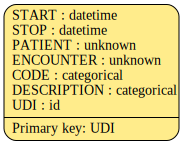

In [ ]:
metadata.visualize()

## 2 Creating a Synthesizer

An SDV **synthesizer** is an object that you can use to create synthetic data. It learns patterns from the real data and replicates them to generate synthetic data.

In [ ]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(real_data)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


## 2.1 Generating Synthetic Data
Use the `sample` function and pass in any number of rows to synthesize.

In [ ]:
synthetic_data = synthesizer.sample(num_rows=500)
synthetic_data.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,UDI
0,2021-10-23T05:05:30,NaN,sdv-pii-s3hm0,sdv-pii-mn7ro,705643001,Coronary artery stent (physical object),sdv-id-aTWGGO
1,2019-12-24T10:02:23,NaN,sdv-pii-tk8vd,sdv-pii-79qml,705643001,Hemodialysis machine device (physical object),sdv-id-jfCYpX
2,2021-10-23T05:05:30,NaN,sdv-pii-8pcal,sdv-pii-6z4l5,449071006,Implantable defibrillator device (physical ob...,sdv-id-DVHooK
3,2021-10-23T05:05:30,2021-01-14T20:12:07,sdv-pii-k37fm,sdv-pii-4p43t,72506001,Coronary artery stent (physical object),sdv-id-cuDMXU
4,2021-10-23T05:05:30,NaN,sdv-pii-fbmi5,sdv-pii-vn8ju,72506001,Coronary artery stent (physical object),sdv-id-KGLmyn


## 2.2 Evaluating Real vs. Synthetic Data

SDV has built-in functions for evaluating the synthetic data and getting more insight.

As a first step, we can run a **diagnostic** to ensure that the data is valid. SDV's diagnostic performs some basic checks such as:

- All primary keys must be unique
- Continuous values must adhere to the min/max of the real data
- Discrete columns (non-PII) must have the same categories as the real data
- Etc.

In [ ]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 7/7 [00:00<00:00, 974.22it/s]|
Data Validity Score: 99.8%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 381.89it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.9%



<font color="green"><b>The score is 100%</b></font>, indicating that the data is fully valid.

We can also measure the data quality or the statistical similarity between the real and synthetic data. This value may vary anywhere from 0 to 100%.

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 7/7 [00:00<00:00, 824.51it/s]|
Column Shapes Score: 66.5%

(2/2) Evaluating Column Pair Trends: |██████████| 21/21 [00:00<00:00, 1214.08it/s]|
Column Pair Trends Score: 18.0%

Overall Score (Average): 42.25%



According to the score, the synthetic data is about 78% similar to the real data in terms of statistical similarity.

We can also get more details from the report. For example, the Column Shapes sub-score is 80%. Which columns had the highest vs. the lowest scores?

In [ ]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,START,KSComplement,0.485236
1,STOP,KSComplement,0.562500
2,CODE,TVComplement,0.813079
3,DESCRIPTION,TVComplement,0.799079


## 2.3 Visualizing the Data
For more insights, we can visualize the real vs. synthetic data.

Let's perform a 1D visualization comparing a column of the real data to the synthetic data.

In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='HEALTHCARE_EXPENSES',
    metadata=metadata
)

fig.show()

We can also visualize in 2D, comparing the correlations of a pair of columns.

In [ ]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
    metadata=metadata
)

fig.show()

## 2.5 Anonymization

In the original dataset, we had some sensitive columns . In the synthetic data, these columns are **fully anonymized** -- they contain entirely fake values that follow the format of the original.

PII columns are not included in the quality report, but we can inspect them to see that they are different.

In [ ]:
sensitive_column_names = ['ADDRESS', 'SSN', 'DRIVERS']

real_data[sensitive_column_names].head(3)

,ADDRESS,SSN,DRIVERS
0,620 Lynch Tunnel Apt 0,999-65-3251,NaN
1,972 Tillman Branch Suite 48,999-49-3323,S99941126
2,1060 Bernhard Crossroad Suite 15,999-10-8743,S99996708


In [ ]:
synthetic_data[sensitive_column_names].head(3)

,ADDRESS,SSN,DRIVERS
0,sdv-pii-uyl8b,249-68-0910,sdv-pii-r2gdu
1,sdv-pii-mfb4b,437-98-7706,sdv-pii-yre9p
2,sdv-pii-a017m,080-44-3302,sdv-pii-blofc


# 3. CTGAN Customization
When using this synthesizer, we can make a tradeoff between training time and data quality using the `epochs` parameter: Higher `epochs` means that the synthesizer will train for longer, and ideally improve the data quality.

To see the progress, we can also turn on the `verbose` parameter. This will show a progress bar that will fill up as the synthesizer completes the fit process.


In [ ]:
custom_synthesizer = CTGANSynthesizer(
    metadata,
    epochs=1000,
    verbose=True)
custom_synthesizer.fit(real_data)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
Gen. (-0.49) | Discrim. (-0.03): 100%|██████████| 1000/1000 [00:27<00:00, 36.53it/s]


After we've trained our synthesizer, we can verify the changes to the data quality by creating some synthetic data and evaluating it.

In [ ]:
synthetic_data_customized = custom_synthesizer.sample(num_rows=500)

quality_report = evaluate_quality(
    real_data,
    synthetic_data_customized,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 7/7 [00:00<00:00, 790.72it/s]|
Column Shapes Score: 77.75%

(2/2) Evaluating Column Pair Trends: |██████████| 21/21 [00:00<00:00, 982.60it/s]|
Column Pair Trends Score: 84.38%

Overall Score (Average): 81.06%



In [ ]:
synthetic_data_customized.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,UDI
0,1955-02-21T11:55:25,NaN,sdv-pii-s3hm0,sdv-pii-mn7ro,705643001,Coronary artery stent (physical object),sdv-id-aTWGGO
1,1995-02-12T19:51:05,NaN,sdv-pii-tk8vd,sdv-pii-79qml,705643001,Coronary artery stent (physical object),sdv-id-jfCYpX
2,2011-03-23T23:38:58,NaN,sdv-pii-8pcal,sdv-pii-6z4l5,72506001,Implantable defibrillator device (physical ob...,sdv-id-DVHooK
3,1978-11-14T01:08:43,2021-01-14T12:39:01,sdv-pii-k37fm,sdv-pii-4p43t,72506001,Implantable defibrillator device (physical ob...,sdv-id-cuDMXU
4,1978-03-03T11:34:49,NaN,sdv-pii-fbmi5,sdv-pii-vn8ju,705643001,Coronary artery stent (physical object),sdv-id-KGLmyn


In [ ]:
synthetic_data_customized.to_csv('synthesized_data_devices.csv', index=False)

While GANs are able to model complex patterns and shapes, it is not easy to understand how they are learning -- but it is possible to modify the underlying architecture of the neural networks.

For users who are familiar with the GAN architecture, there are extra parameters you can use to tune CTGAN to your particular needs. For more details, see the CTGAN documentation.

For more information about the CTGAN Synthesizer, visit the **[documentation](https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/ctgansynthesizer)**.

**Need more help?** [Browse all tutorials](https://docs.sdv.dev/sdv/demos).